In [58]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap

In [33]:
# Load the dataset
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [34]:
# Total no.of rows and columns
df.shape

(101, 18)

In [35]:
# Check missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [36]:
# Information about all the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [37]:
# Description of the dataset
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [38]:
# Drop the 'animal name' column as it is not needed for classification
df = df.drop('animal name', axis=1)

In [39]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


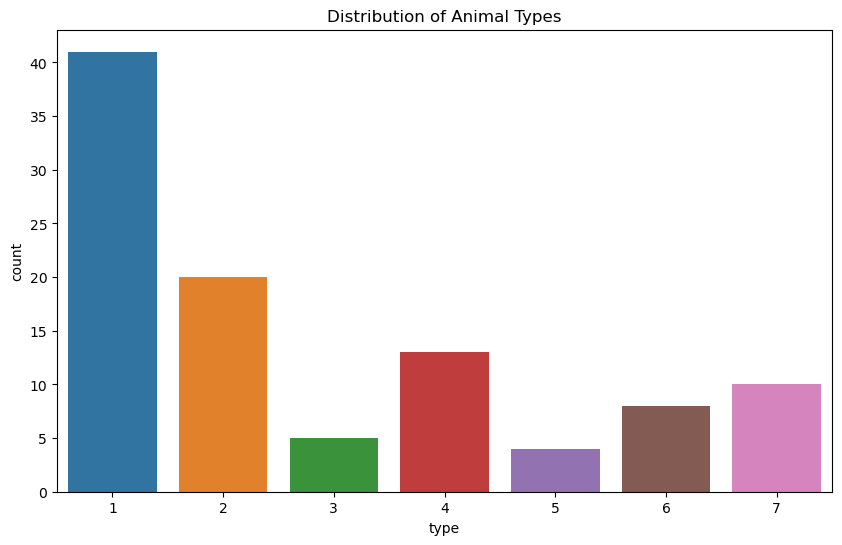

In [40]:
# Visualize the distribution of animal types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.show()

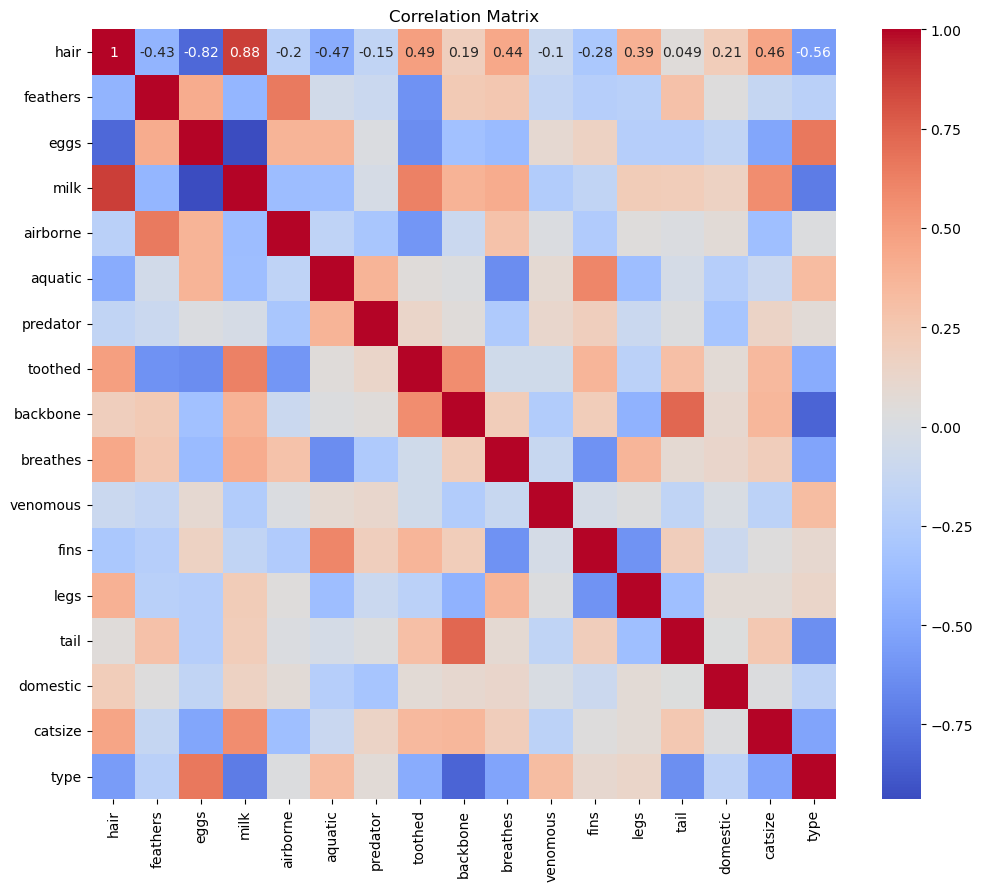

In [41]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Split the data into features and target variable
X = df.drop('type', axis=1)
y = df['type']

In [43]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [44]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# Train the KNN classifier on the reduced feature space
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
# Predict the test set results
y_pred = knn_pca.predict(X_test_pca)

In [49]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
print('Accuracy Score:', accuracy)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  2  0  0  1  0]
 [ 0  0  0  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         1

    accuracy                           0.86        21
   macro avg       0.69      0.72      0.66        21
weighted avg       0.87      0.86      0.83        21

Accuracy Score: 0.8571428571428571


In [50]:
# Function to test different distance metrics and values of k
def test_knn_metrics(X_train, y_train, metrics, k_values):
    results = {}
    for metric in metrics:
        results[metric] = []
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
            cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
            results[metric].append((k, np.mean(cv_scores)))
    return results

# Define the distance metrics and range of k values
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = range(1, 10)

# Test the metrics
results = test_knn_metrics(X_train, y_train, distance_metrics, k_values)

# Print the results
for metric in results:
    print(f"Results for {metric}:")
    for k, score in results[metric]:
        print(f"k={k}: Accuracy={score:.4f}")
    print()

Results for euclidean:
k=1: Accuracy=0.9625
k=2: Accuracy=0.9375
k=3: Accuracy=0.8875
k=4: Accuracy=0.9250
k=5: Accuracy=0.9375
k=6: Accuracy=0.9000
k=7: Accuracy=0.8750
k=8: Accuracy=0.8625
k=9: Accuracy=0.8375

Results for manhattan:
k=1: Accuracy=0.9625
k=2: Accuracy=0.9375
k=3: Accuracy=0.9000
k=4: Accuracy=0.9250
k=5: Accuracy=0.9500
k=6: Accuracy=0.9500
k=7: Accuracy=0.9125
k=8: Accuracy=0.9125
k=9: Accuracy=0.8625

Results for chebyshev:
k=1: Accuracy=0.9125
k=2: Accuracy=0.9000
k=3: Accuracy=0.8625
k=4: Accuracy=0.7875
k=5: Accuracy=0.7625
k=6: Accuracy=0.7250
k=7: Accuracy=0.7750
k=8: Accuracy=0.7125
k=9: Accuracy=0.6750



In [51]:
# Choose the best parameters based on the results
best_metric = 'euclidean'  # Replace with the best metric found
best_k = 5  # Replace with the best k found

In [54]:
# Train the KNN classifier on the reduced feature space
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [55]:
# Predict the test set results
y_pred = knn.predict(X_test)

In [56]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
print('Accuracy Score:', accuracy)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

Accuracy Score: 0.9523809523809523


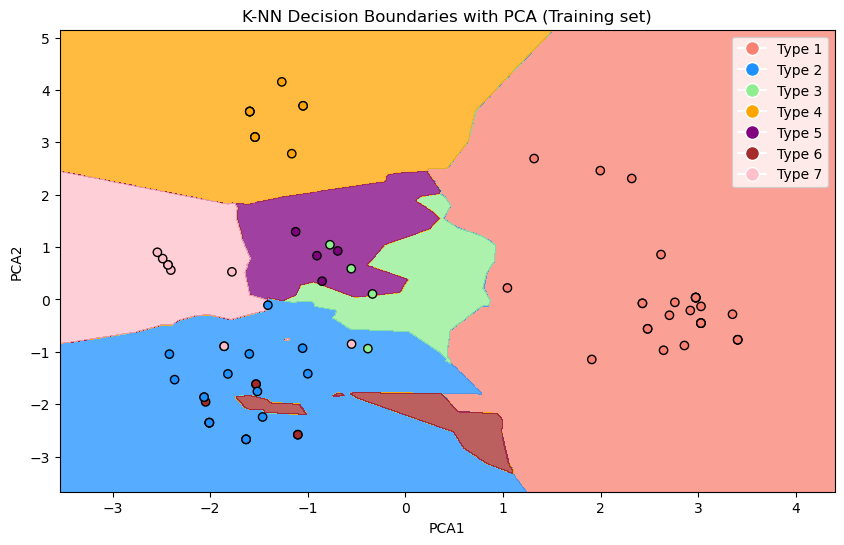

In [59]:
# Reduce the feature space to 2D using PCA for visualization purpose
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the classification for each point in the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue', 'lightgreen', 'orange', 'purple', 'brown', 'pink')))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(('salmon', 'dodgerblue', 'lightgreen', 'orange', 'purple', 'brown', 'pink')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Adding labels and title
plt.title('K-NN Decision Boundaries with PCA (Training set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Create legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Type {i+1}')
                  for i, color in enumerate(['salmon', 'dodgerblue', 'lightgreen', 'orange', 'purple', 'brown', 'pink'])]
plt.legend(handles=legend_handles)
plt.show()